In [120]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [247]:
def show(img):
    plt.imshow(img, cmap='gray')
    plt.show()
    
def show_mask_and_spectrum(mask, spec):
    plt.figure(figsize=(8,8))
    plt.subplot(121),plt.imshow(mask, cmap = 'gray')
    plt.title('Filter'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(spec, cmap = 'gray')
    plt.title('Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()
    
def show_before_after(orig, img):
    plt.figure(figsize=(8,8))
    plt.subplot(121),plt.imshow(orig, cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img, cmap = 'gray')
    plt.title('New'), plt.xticks([]), plt.yticks([])
    plt.show()
       
def get_spectrum_shift(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    return fshift

def magnitude(fshift):
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    return magnitude_spectrum

def inverse_spectrum(fshift):
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

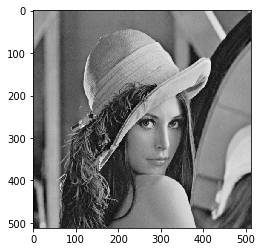

In [122]:
img = cv2.imread('image.png', 0)
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
show(img)

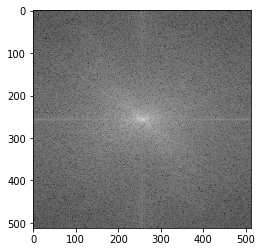

In [123]:
dft_shift = get_spectrum_shift(img)
magnitude_spectrum = magnitude(dft_shift)
show(magnitude_spectrum)

In [267]:
# distance to center
def dist(x,y):
    s = (x-crow)*(x-crow) + (y-ccol)*(y-ccol)
    return np.sqrt(s)

def ILF(r):
    mask = np.zeros((rows, cols),np.uint8)
    for x in range(rows):
        for y in range(cols):
            if dist(x,y) < r:
                mask[x][y] = 1
    return mask

def IHF(r):
    mask = np.zeros((rows, cols),np.uint8)
    for x in range(rows):
        for y in range(cols):
            if dist(x,y) >= r:
                mask[x][y] = 1
    return mask

def BLF(d0, n):
    mask = np.zeros((rows,cols), np.float32)
    for x in range(rows):
        for y in range(cols):
            d = dist(x,y) / d0
            d = d*d
            for i in range(n):
                d *= d
            mask[x][y] = 1.0 / (1.0 + d)
    return mask

def BHF(d0, n):
    mask = np.zeros((rows,cols), np.float32)
    for x in range(rows):
        for y in range(cols):
            d = d0 / dist(x,y)
            d = d*d
            for i in range(n):
                d *= d
            mask[x][y] = 1 / (1.0 + d)
    return mask
    
def GLF(d0):
    mask = np.zeros((rows,cols), np.float32)
    for x in range(rows):
        for y in range(cols):
            d = dist(x,y)
            mask[x][y] = np.exp(-dist(x,y) / 2*d0*d0)
    return mask

def GHF(d0):
    mask = np.zeros((rows,cols), np.float32)
    for x in range(rows):
        for y in range(cols):
            d = dist(x,y)
            mask[x][y] = 1 - np.exp(-d*d / 2*d0*d0)
    return mask

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


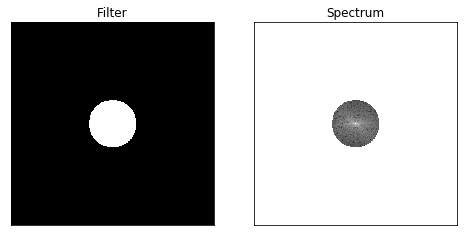

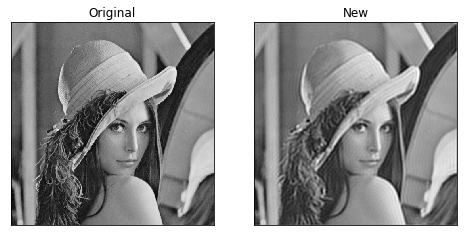

In [248]:
# Идеальный фильтр низких частот
mask = ILF(60)
fshift = dft_shift * mask
show_mask_and_spectrum(mask, magnitude(fshift))
new_img = inverse_spectrum(fshift)
show_before_after(img, new_img)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


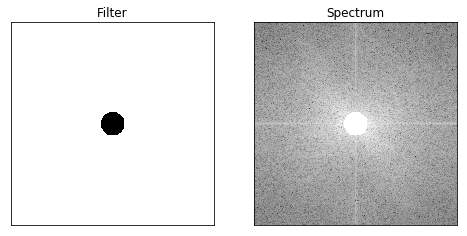

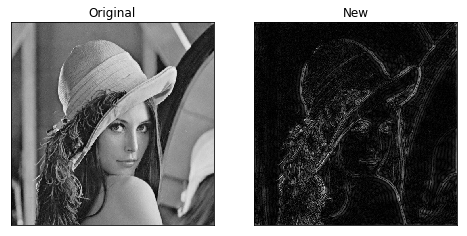

In [255]:
# Идеальный фильтр высоких частот
mask = IHF(30)
fshift = dft_shift * mask
show_mask_and_spectrum(mask, magnitude(fshift))
new_img = inverse_spectrum(fshift)
show_before_after(img, new_img)

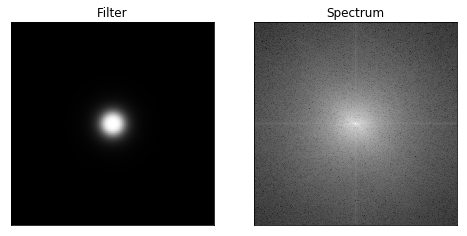

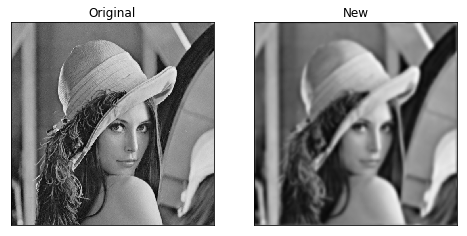

In [250]:
# фильтр Баттерворта низких частот
mask = BLF(30, 1)
fshift = dft_shift * mask
show_mask_and_spectrum(mask, magnitude(fshift))
new_img = inverse_spectrum(fshift)
show_before_after(img, new_img)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


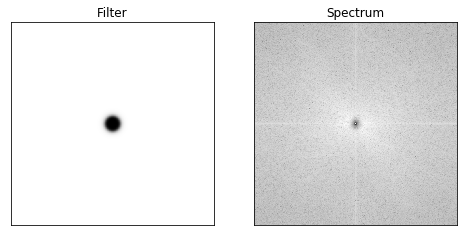

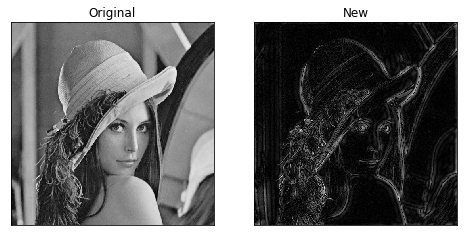

In [256]:
# фильтр Баттерворта высоких частот
mask = BHF(20, 2)
fshift = dft_shift * mask
show_mask_and_spectrum(mask, magnitude(fshift))
new_img = inverse_spectrum(fshift)
show_before_after(img, new_img)

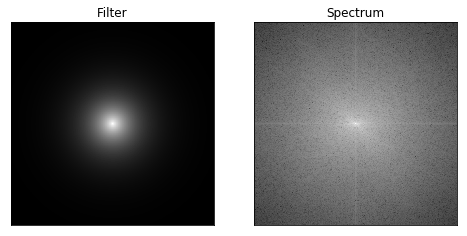

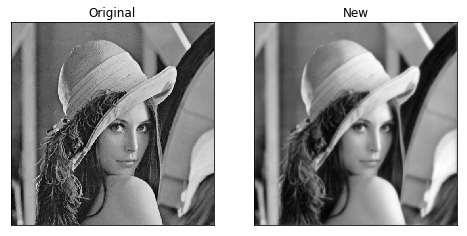

In [268]:
# фильтр Гаусса низких частот
mask = GLF(0.2)
fshift = dft_shift * mask
show_mask_and_spectrum(mask, magnitude(fshift))
new_img = inverse_spectrum(fshift)
show_before_after(img, new_img)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


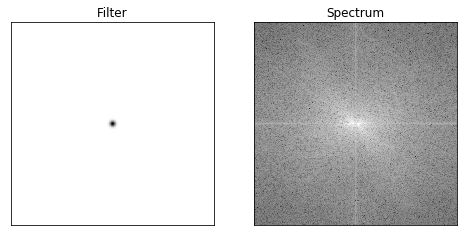

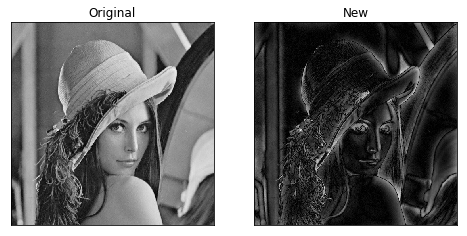

In [270]:
# фильтр Гаусса высоких частот
mask = GHF(0.2)
fshift = dft_shift * mask
show_mask_and_spectrum(mask, magnitude(fshift))
new_img = inverse_spectrum(fshift)
show_before_after(img, new_img)